# import

In [28]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# val_df load

In [29]:
# train_df = pd.read_csv('train.csv') # Train
# train_df.head()

In [30]:
val_df = pd.read_csv('val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


# val_df로 X_train, X_test, y_train, y_test 생성

In [31]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']

In [32]:
from sklearn.model_selection import train_test_split

X = val_df[features]
y = val_df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# standardscaler

In [33]:
scaler_standard = StandardScaler()
scaler_standard.fit(X_train)
X_train = pd.DataFrame(data=scaler_standard.transform(X_train),columns=features)
X_test = pd.DataFrame(data=scaler_standard.transform(X_test),columns=features)

# model define & fit

In [34]:
# from pyod.models.xgbod import XGBOD

# model = XGBOD()
# model.fit(X_train, y_train)

In [35]:
val_normal, val_fraud = val_df['Class'].value_counts() 
val_contamination = val_fraud / val_normal

In [36]:
from pyod.models.iforest import IForest

model = IForest()
model.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

# evaluation

In [37]:
pred_test = model.predict(X_test)
test_score = f1_score(y_test, pred_test, average='macro')
print(f'Test F1 Score : [{test_score}]')
print(classification_report(y_test, pred_test))

Test F1 Score : [0.48338778575249863]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      7108
           1       0.01      0.88      0.02         8

    accuracy                           0.90      7116
   macro avg       0.50      0.89      0.48      7116
weighted avg       1.00      0.90      0.95      7116



# feature 분포 확인

In [38]:
y_test['y_pred'] = pred_test
y_test = y_test.reset_index(drop=True)

In [40]:
total_test = pd.concat([X_test,y_test],axis=1)
total_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Class,y_pred
0,0.582543,-0.391678,0.779651,0.686756,-0.615460,0.929060,-0.883342,0.402949,1.639374,-0.470340,...,-0.174879,-1.184345,0.755399,0.963541,0.137981,0.059035,-0.255434,-1.273729,0,0
1,1.086790,-0.547887,-1.552761,-0.320282,0.055183,-0.739919,0.244703,-0.404309,-0.640689,0.865162,...,-0.036589,0.814441,0.425037,1.653365,-0.323804,-0.216103,0.069411,0.698316,0,0
2,-0.971732,1.323156,-0.050180,-0.242402,-0.524649,-0.211406,-0.439473,1.313008,-0.620333,-0.173349,...,0.085189,-0.889540,0.092446,0.252428,0.253878,0.114442,-0.337149,-1.161025,0,0
3,0.767784,-0.682881,0.695447,-0.856126,-1.575055,-0.847664,-1.073679,-0.179868,-1.505702,1.302345,...,0.109156,1.531461,0.514775,-0.280563,0.139581,0.117540,-0.332730,-0.758592,0,0
4,-0.332564,-0.140601,0.483131,-1.597012,0.744246,0.381886,0.121717,0.168323,-1.489490,0.065842,...,-0.639219,-2.786157,0.797469,-0.309675,0.128498,0.255198,-0.208278,-1.385948,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7111,-2.028027,-6.939948,-3.718368,0.806244,-1.735295,1.674294,3.115611,-0.529763,-1.053744,-0.494625,...,-4.551538,-1.246850,-2.004335,-0.555925,-1.533854,1.563449,13.248439,0.653981,0,1
7112,-0.129917,0.732887,-1.283666,-0.047916,0.136097,0.233038,-0.689231,-5.252699,-0.913022,-1.200535,...,-0.743588,-0.427392,0.765912,-0.211186,0.603639,1.151692,0.448806,1.379009,0,1
7113,1.010507,-0.237200,-0.140381,0.252584,-0.516688,-0.300461,-0.500384,0.063232,0.945792,0.003219,...,0.641596,-0.054568,-0.934246,-1.315879,0.088991,-0.138905,-0.350272,1.269256,0,0
7114,-5.064039,-7.683031,1.192716,4.574045,3.515579,-1.450781,-4.166620,1.774475,0.320862,0.095958,...,1.596385,-0.307228,0.312848,0.964507,0.839316,-5.350281,2.047442,-1.277671,0,1


In [41]:
right = total_test[total_test['Class'] == total_test['y_pred']]
wrong = total_test[total_test['Class'] != total_test['y_pred']]

In [78]:
right.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Class,y_pred
count,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,...,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000
mean,0.167793,0.020312,0.061060,-0.048341,0.002402,-0.061448,0.014161,0.042593,-0.031368,-0.034906,...,-0.004878,0.007577,-0.014290,-0.002090,0.026151,0.035582,-0.105161,0.019006,0.001093,0.001093
std,0.741610,0.648134,0.877165,0.920284,0.793066,0.871972,0.746399,0.529443,0.899649,0.764772,...,0.463328,0.970290,0.911309,0.960706,0.583516,0.497766,0.479297,1.004155,0.033041,0.033041
min,-10.300777,-3.711707,-15.227171,-3.521376,-11.257530,-3.969961,-24.318958,-10.928231,-8.180539,-17.283183,...,-3.422693,-4.462577,-4.837938,-2.765655,-10.553600,-3.712799,-0.380849,-1.992074,0.000000,0.000000
25%,-0.386253,-0.361034,-0.500741,-0.609133,-0.494489,-0.591382,-0.436070,-0.188842,-0.560748,-0.462667,...,-0.253514,-0.572604,-0.614014,-0.659093,-0.164157,-0.159844,-0.356834,-0.852618,0.000000,0.000000
50%,0.189420,0.031611,0.147229,-0.030151,-0.037542,-0.236534,0.045922,0.006389,-0.071900,-0.089795,...,-0.019870,0.066075,0.019736,-0.097551,0.009935,0.045742,-0.284852,-0.206552,0.000000,0.000000
75%,0.760713,0.464450,0.689332,0.460638,0.410392,0.210311,0.466646,0.253685,0.494858,0.371195,...,0.228135,0.717592,0.635038,0.478467,0.215417,0.255963,-0.074694,0.962878,0.000000,0.000000
max,1.263701,9.454754,2.440396,8.624610,3.960280,3.980845,3.854205,7.617466,3.736117,3.289226,...,5.366242,5.059973,3.889973,5.091866,3.224464,4.058083,4.712346,1.648879,1.000000,1.000000


In [79]:
wrong.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Class,y_pred
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,...,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,-1.403499,-0.523652,-0.657341,0.246457,-0.050567,0.321641,-0.037501,-0.563542,0.307914,0.315350,...,0.101000,-0.179841,0.022965,0.093261,-0.204752,-0.232097,1.135443,0.105729,0.001408,0.998592
std,1.962125,2.943240,1.650782,1.545018,2.254709,1.737430,2.433779,2.832435,1.528541,1.984478,...,2.805217,1.235146,1.583668,1.141289,2.754768,3.557631,3.242491,1.027025,0.037529,0.037529
min,-12.547623,-24.661897,-9.917160,-3.218530,-11.334864,-12.505724,-14.137085,-24.077012,-3.357745,-5.246099,...,-17.887524,-4.115779,-8.037916,-2.952385,-25.048630,-28.749906,-0.380849,-1.991779,0.000000,0.000000
25%,-2.060555,-1.632388,-1.570905,-0.784469,-1.045186,-0.699225,-1.038684,-0.855236,-0.736253,-0.987013,...,-0.682131,-0.976637,-0.872444,-0.702895,-0.760327,-1.120313,-0.341108,-0.800097,0.000000,1.000000
50%,-0.970772,-0.018810,-0.479040,0.035737,-0.115437,0.326786,0.156476,-0.055934,0.084813,0.056401,...,-0.001184,-0.016641,0.122631,-0.076815,-0.031098,0.062413,-0.099376,0.409778,0.000000,1.000000
75%,-0.235810,1.078889,0.461504,1.068110,0.920272,1.302421,1.019005,0.528546,1.219865,1.078378,...,0.668495,0.853427,0.960488,0.858928,0.782622,0.633742,1.555734,1.026356,0.000000,1.000000
max,1.189870,5.506110,2.625028,6.941967,18.402163,5.699091,13.646144,10.556252,6.413528,10.439847,...,23.647084,2.337424,5.384690,4.879846,11.686012,54.766579,51.666543,1.644894,1.000000,1.000000


In [68]:
wrong_0_1 = wrong[wrong['Class']==0]
wrong_1_0 = wrong[wrong['Class']==1]
val_df_0 = val_df[val_df['Class']==0]
val_df_1 = val_df[val_df['Class']==1]

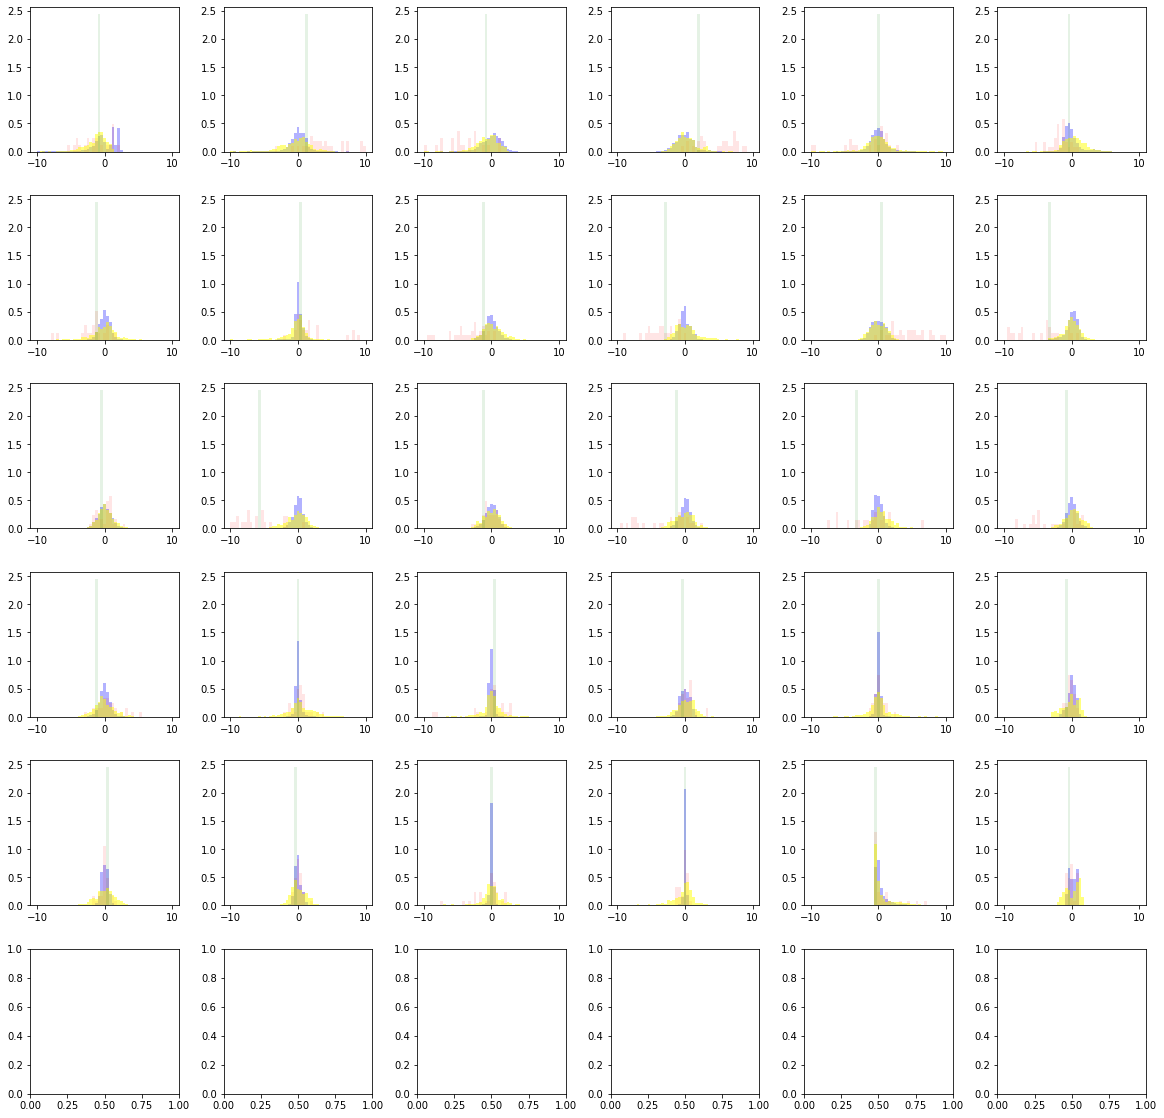

In [75]:
fig, axes = plt.subplots(6,6)
fig.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']
idx = 0
for i in range(5):
    for j in range(6):
        axes[i,j].hist(val_df_0[col[idx]], bins =  np.linspace(-10, 10, 50), alpha = 0.3, density = True, color = 'blue')
        axes[i,j].hist(val_df_1[col[idx]], bins =  np.linspace(-10, 10, 50), alpha = 0.1, density = True, color = 'red')
        axes[i,j].hist(wrong_0_1[col[idx]], bins =  np.linspace(-10, 10, 50), alpha = 0.5, density = True, color = 'yellow')
        axes[i,j].hist(wrong_1_0[col[idx]], bins =  np.linspace(-10, 10, 50), alpha = 0.1, density = True, color = 'green')
        idx += 1
plt.show()

# test_df load and prediction

In [16]:
test_df = pd.read_csv('test.csv') # Test
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [17]:
test = test_df[features]
test_pred = model.predict(test) # model prediction

# submission

In [18]:
submit = pd.read_csv('./sample_submission.csv')
submit['Class'] = test_pred
submit.to_csv('submit.csv', index=False)